# Matrices for Graph Traversal

In [1]:
import numpy as np

In [28]:
n = 5

# Make a sparsely populated random matrix
A = np.zeros((n, n))

from random import randrange, uniform
for i in range(n*n//2):
    i, j = randrange(n), randrange(n)
    w = round(uniform(0, 1), 1)
    A[i, j] = w
    
A

array([[ 0. ,  0. ,  0.8,  0.1,  1. ],
       [ 0. ,  0. ,  0. ,  0.8,  0. ],
       [ 0. ,  0.5,  0.8,  0.7,  0. ],
       [ 0.7,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.7,  0.6,  0. ]])

For a reason that will become clear in a minute, we need the columns of $A$ to be normalized to sum to 1:

In [29]:
A_cols = np.sum(A, axis=0)
A_cols[A_cols == 0] = 1
A = A/A_cols

print(A)
print(np.sum(A, axis=0))

[[ 0.          0.          0.34782609  0.04545455  1.        ]
 [ 0.          0.          0.          0.36363636  0.        ]
 [ 0.          1.          0.34782609  0.31818182  0.        ]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.30434783  0.27272727  0.        ]]
[ 1.  1.  1.  1.  1.]


This short piece of code exports the matrix in a format that's readable to the [dot](http://graphviz.org) graph drawing tool.

In [30]:
def to_dot(A, vec=None):
    lines = ['digraph mygraph { size="4,4";']
    for i in range(n):
        for j in range(n):
            if A[i, j]:
                lines.append("%d -> %d [label=\"%0.1f\"];" % (j, i, A[i, j]))
    if vec is not None:
        for i, vec_i in enumerate(vec):
            assert 0<=vec_i<=1
            lines.append(
                '%d [style="filled", fillcolor="#ff%02xff"];'
                % (i, int(255*(1-vec_i))))
    lines.append("}")
    return "\n".join(lines)

See?

In [31]:
print(to_dot(A))

digraph mygraph { size="4,4";
2 -> 0 [label="0.3"];
3 -> 0 [label="0.0"];
4 -> 0 [label="1.0"];
3 -> 1 [label="0.4"];
1 -> 2 [label="1.0"];
2 -> 2 [label="0.3"];
3 -> 2 [label="0.3"];
0 -> 3 [label="1.0"];
2 -> 4 [label="0.3"];
3 -> 4 [label="0.3"];
}


In [32]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


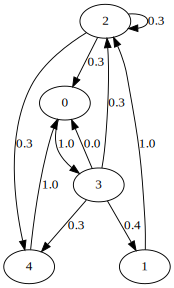

In [33]:
%dotstr to_dot(A)

Another thing we can do is plot distributions on the graph:

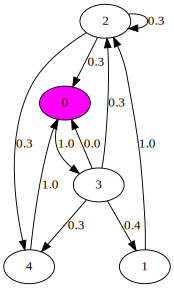

In [41]:
d = np.zeros((n,))
d[0] = 1
%dotstr to_dot(A, d)

In [42]:
d

array([ 1.,  0.,  0.,  0.,  0.])

Now, how would we model the spread of this distribution across the graph?

[ 0.38339921  0.          0.4743083   0.04545455  0.09683794]


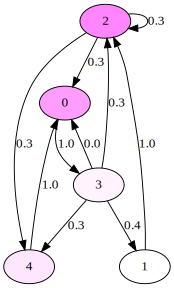

In [45]:
d = A.dot(d)
print(d)
%dotstr to_dot(A, d)

In [46]:
d

array([ 0.38339921,  0.        ,  0.4743083 ,  0.04545455,  0.09683794])

* How would you find the steady state of this traversal?

In [47]:
# Just keep iterating until the distribution stabilizes.

* Any predictions about `np.sum(d)`?

In [48]:
# Always stays 1.